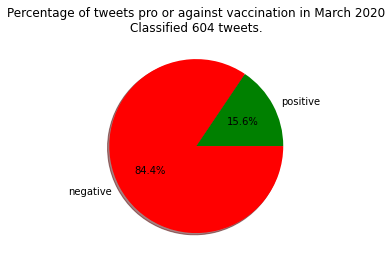

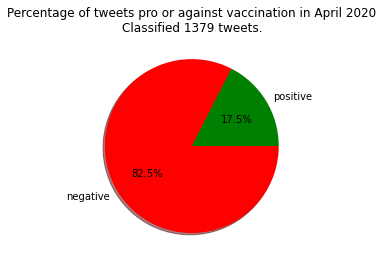

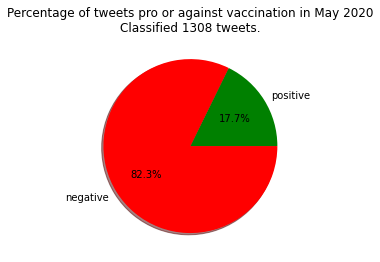

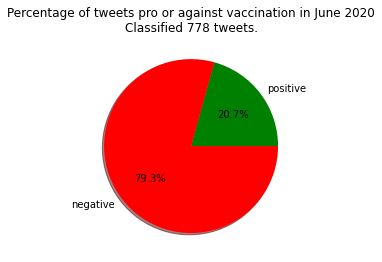

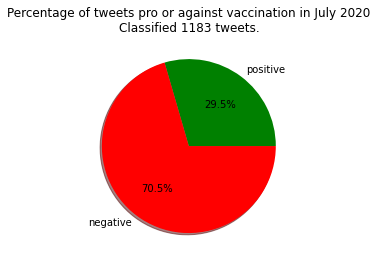

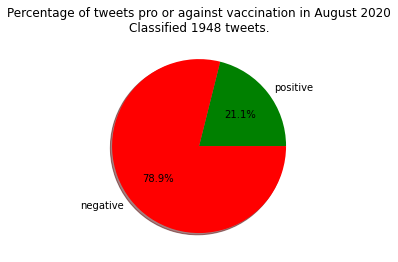

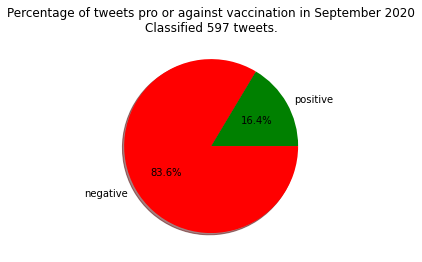

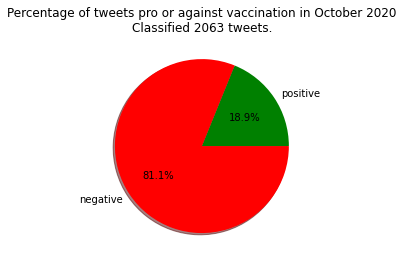

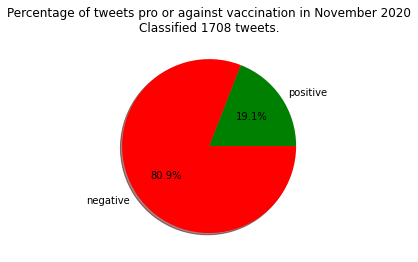

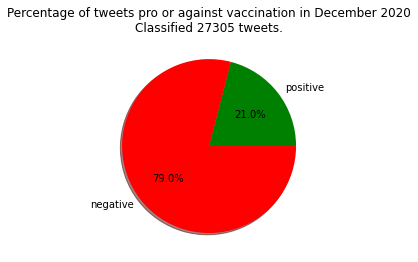

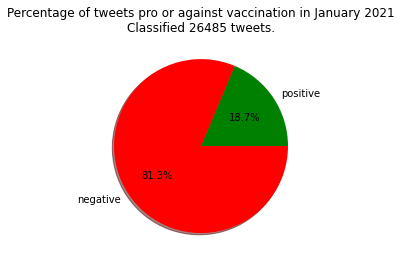

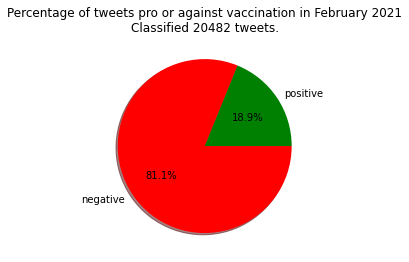

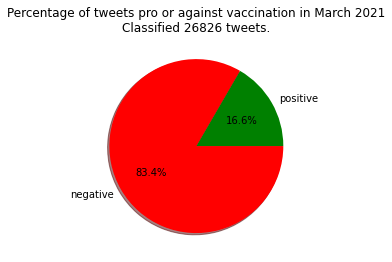

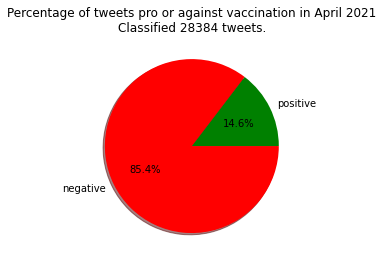

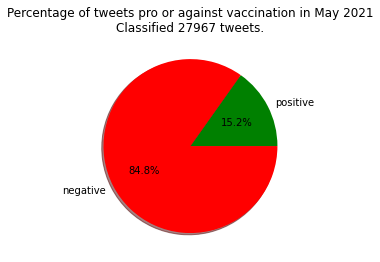

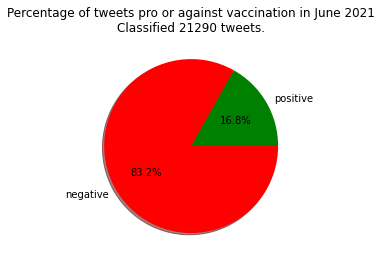

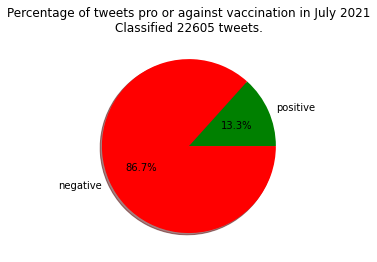

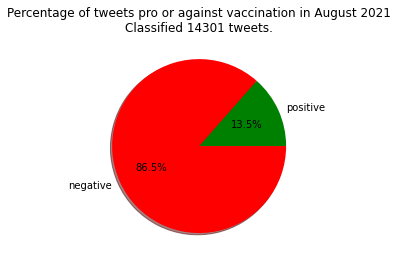

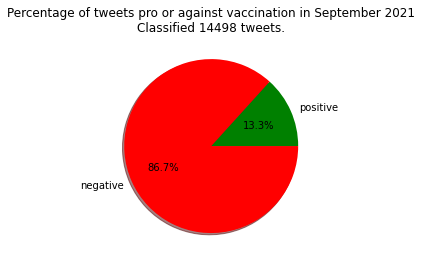

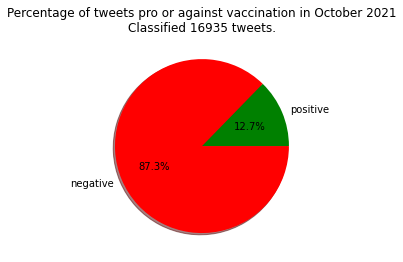

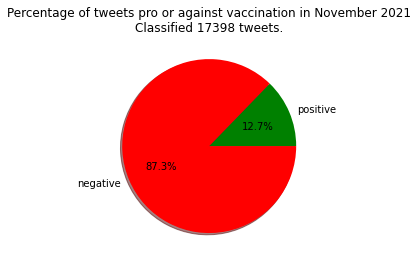

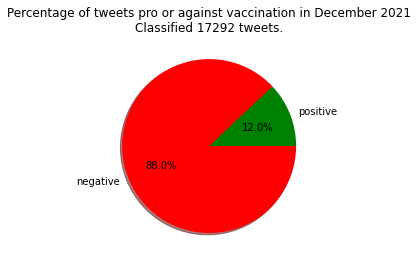

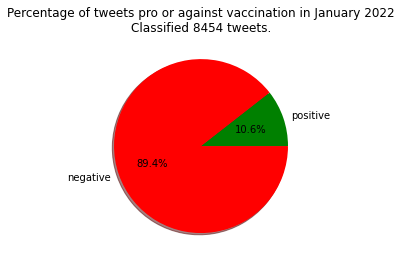

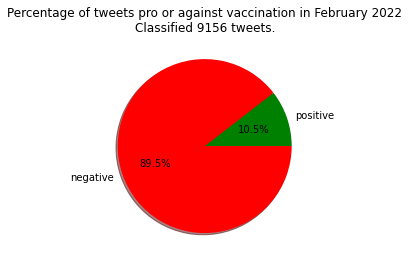

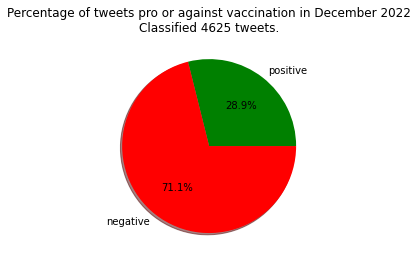

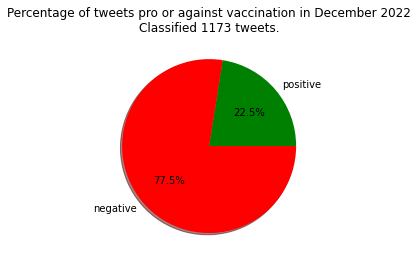

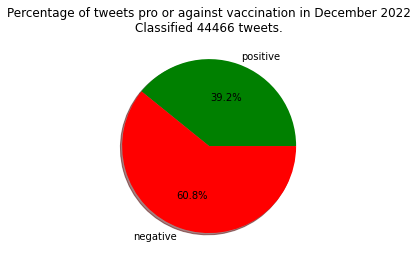

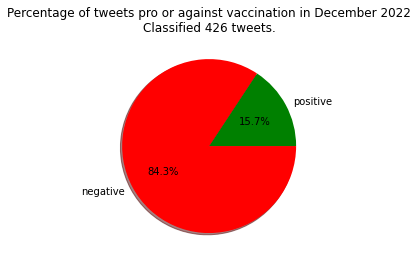

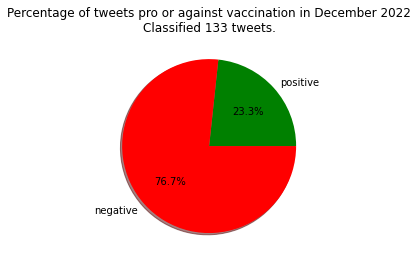

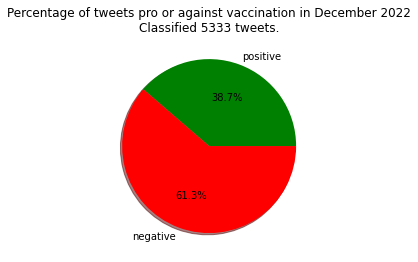

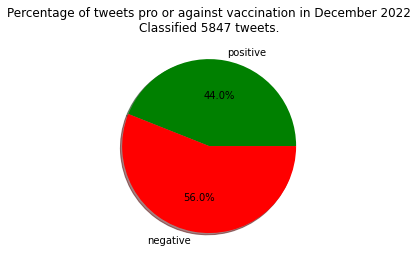

In [12]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter


algorithm = 'ComplementNB'
acc = '76'
dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'

vaccines = ["biontech", "janssen", "moderna",
            "oxford", "sinopharm", "sinovac", "sputnik"]


n_grams = [(1, 2)]
years = ["2020", "2021", "2022"]
months = ["january", "february", "march", "april", "may", "june",
          "july", "august", "september", "october", "november", "december"]

for n_gram in n_grams:
    for year in years:
        for month in months:
            vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"

            model_path = f"../models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"

            # already processed
            try:
                df = pd.read_csv(f'../{year}-data/covid-{month}.csv', delimiter=',')
            except Exception:
                continue

            df = df.drop_duplicates()

            df = df[['tweet', 'sentiment']]

            tfidf = joblib.load(vectorizer_path)

            model = joblib.load(model_path)

            X = df.iloc[:, 0].fillna(' ')

            tweets = X

            num_of_tweets_analyzed = len(tweets)

            y_pred = tfidf.transform(X)

            predictions = model.predict(y_pred)

            # saving tweets to csv
            tweets.to_csv(f'../analysis/tweets-{month}-{year}-{n_gram}.csv')
            # saving sentiment predictions to csv
            np.savetxt(f'../analysis/predictions-{month}-{year}-{n_gram}.csv',
                    predictions, delimiter=',', fmt=('%s'))

            # adding sentiment column to the beginning
            df = pd.read_csv(
                f'../analysis/predictions-{month}-{year}-{n_gram}.csv', header=None)
            df.rename(columns={0: 'sentiment'}, inplace=True)
            # save to new csv file
            df.to_csv(
                f'../analysis/predictions-{month}-{year}-{n_gram}.csv', index=False)

            # merging tweets and predictions
            filenames = [f'../analysis/tweets-{month}-{year}-{n_gram}.csv',
                         f'../analysis/predictions-{month}-{year}-{n_gram}.csv']
            dfs = []
            for filename in filenames:
                # read the csv, making sure the first two columns are str
                df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
                # change the column names so they won't collide during concatenation
                df.columns = [filename + str(cname) for cname in df.columns]
                dfs.append(df)

            # concatenate them horizontally
            merged = pd.concat(dfs, axis=1)
            # write it out
            merged.to_csv(
                f"../analysis/merged-{month}-{year}-{n_gram}.csv", header=None, index=None)

            df = pd.read_csv(f'../analysis/merged-{month}-{year}-{n_gram}.csv')

            labels = ['negative', 'positive']

            title_type = df.groupby('sentiment').agg('count')

            type_labels = ['positive', 'negative']
            type_counts = title_type.tweet.sort_values()

            colors = ['g', 'r']

            plt.subplot(
                aspect=1, title=f'Percentage of tweets pro or against vaccination in {month.capitalize()} {year}\nClassified {num_of_tweets_analyzed} tweets.')
            type_show_ids = plt.pie(type_counts, labels=type_labels,
                                    autopct='%1.1f%%', shadow=True, colors=colors)
            plt.savefig(f"../visuals/{month}-{year}-{n_gram}.png")
            plt.show()

for n_gram in n_grams:
    for vaccine in vaccines:
            vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"
            model_path = f"../models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"
            # already processed
            df = pd.read_csv(f'../vaccines/{vaccine}.csv', delimiter=',')

            df = df.drop_duplicates()

            df = df[['tweet', 'sentiment']]

            tfidf = joblib.load(vectorizer_path)

            model = joblib.load(model_path)

            X = df.iloc[:, 0].fillna(' ')

            tweets = X

            num_of_tweets_analyzed = len(tweets)

            y_pred = tfidf.transform(X)

            predictions = model.predict(y_pred)

            # saving tweets to csv
            tweets.to_csv(f'../analysis/tweets-{vaccine}.csv')
            # saving sentiment predictions to csv
            np.savetxt(f'../analysis/predictions-{vaccine}.csv',
                    predictions, delimiter=',', fmt=('%s'))

            # adding sentiment column to the beginning
            df = pd.read_csv(
                f'../analysis/predictions-{vaccine}.csv', header=None)
            df.rename(columns={0: 'sentiment'}, inplace=True)
            # save to new csv file
            df.to_csv(
                f'../analysis/predictions-{vaccine}.csv', index=False)

            # merging tweets and predictions
            filenames = [f'../analysis/tweets-{vaccine}.csv',
                         f'../analysis/predictions-{vaccine}.csv']
            dfs = []
            for filename in filenames:
                # read the csv, making sure the first two columns are str
                df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
                # change the column names so they won't collide during concatenation
                df.columns = [filename + str(cname) for cname in df.columns]
                dfs.append(df)

            # concatenate them horizontally
            merged = pd.concat(dfs, axis=1)
            # write it out
            merged.to_csv(
                f"../analysis/merged-{vaccine}.csv", header=None, index=None)

            df = pd.read_csv(f'../analysis/merged-{vaccine}.csv')

            labels = ['negative', 'positive']

            title_type = df.groupby('sentiment').agg('count')

            type_labels = ['positive', 'negative']
            type_counts = title_type.tweet.sort_values()

            colors = ['g', 'r']

            plt.subplot(
                aspect=1, title=f'Percentage of tweets pro or against vaccination in {month.capitalize()} {year}\nClassified {num_of_tweets_analyzed} tweets.')
            type_show_ids = plt.pie(type_counts, labels=type_labels,
                                    autopct='%1.1f%%', shadow=True, colors=colors)
            plt.savefig(f"../visuals/{vaccine}.png")
            plt.show()